In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls1718 = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }

urls1617 = {'EN': 'http://www.football-data.co.uk/mmz4281/1617/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1617/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1617/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1617/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1617/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1617/N1.csv'
                          }

urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1819/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1819/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1819/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1819/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1819/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1819/N1.csv'
                          }
#urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1819/E0.csv'}

In [3]:
x='Manchester United'
''.join([x for x in  x if x.lower() not in ['a','e','i','o','u',' ']])

''.join([x[:3] for x in  x.split()])

'ManUni'

In [4]:
#all_data1617=get_data(urls1617)
all_data=get_data_538()
#all_data['EN']=add_match(all_data['EN'],'Liverpool',2,'Newcastle',0)
#all_data['EN']=add_match(all_data['EN'],'Tottenham',2,'Huddersfield',0)
#all_data['EN']=add_match(all_data['EN'],'Brighton',2,'Arsenal',1)
#all_data['EN']=add_match(all_data['EN'],'Man City',1,'Chelsea',0)
#all_data['EN']=add_match(all_data['EN'],'Man United',2,'Liverpool',1)
all_data['BPL'].tail(10)

,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17115,2018-12-30,BPL,Manchester United,AFC Bournemouth,4,1,2.95,0.82,1.71,1.25
17120,2019-01-01,BPL,Everton,Leicester City,0,1,1.03,0.58,1.74,0.59
17145,2019-01-01,BPL,Arsenal,Fulham,4,1,4.46,1.51,3.01,0.73
17158,2019-01-01,BPL,Cardiff City,Tottenham Hotspur,0,3,0.90,1.57,0.83,0.74
17164,2019-01-02,BPL,AFC Bournemouth,Watford,3,3,3.24,0.95,2.15,1.50
17165,2019-01-02,BPL,Wolverhampton,Crystal Palace,0,2,0.83,2.00,0.55,0.69
17166,2019-01-02,BPL,West Ham United,Brighton and Hove Albion,2,2,0.90,0.84,1.36,0.83
17167,2019-01-02,BPL,Chelsea,Southampton,0,0,0.99,0.19,1.58,0.45
17168,2019-01-02,BPL,Huddersfield Town,Burnley,1,2,0.81,2.88,0.84,1.27
17169,2019-01-02,BPL,Newcastle,Manchester United,0,2,0.64,2.34,0.95,1.46


In [5]:
calibrator=Calibrator('calibration.pkl',redo=True)
for _country in all_data:
    calibrator.process_data(all_data[_country],_country)
teams=calibrator.teams

Force recalibrate
calibration.pkl  exists.
('2018-08-10', 'Marseille', 'Toulouse', 4, 0)
('2018-08-11', 'Nantes', 'AS Monaco', 1, 3)
('2018-08-11', 'St Etienne', 'Guingamp', 2, 1)
('2018-08-11', 'Angers', 'Nimes', 3, 4)
('2018-08-11', 'Montpellier', 'Dijon FCO', 1, 2)
('2018-08-11', 'Nice', 'Reims', 0, 1)
('2018-08-11', 'Lille', 'Stade Rennes', 3, 1)
('2018-08-12', 'Lyon', 'Amiens', 2, 0)
('2018-08-12', 'Bordeaux', 'Strasbourg', 0, 2)
('2018-08-12', 'Paris Saint-Germain', 'Caen', 3, 0)
('2018-08-17', 'Reims', 'Lyon', 1, 0)
('2018-08-18', 'Guingamp', 'Paris Saint-Germain', 1, 3)
('2018-08-18', 'Amiens', 'Montpellier', 1, 2)
('2018-08-18', 'Stade Rennes', 'Angers', 1, 0)
('2018-08-18', 'Caen', 'Nice', 1, 1)
('2018-08-18', 'Dijon FCO', 'Nantes', 2, 0)
('2018-08-18', 'AS Monaco', 'Lille', 0, 0)
('2018-08-19', 'Strasbourg', 'St Etienne', 1, 1)
('2018-08-19', 'Toulouse', 'Bordeaux', 2, 1)
('2018-08-19', 'Nimes', 'Marseille', 3, 1)
('2018-08-24', 'Lyon', 'Strasbourg', 2, 0)
('2018-08-25', 'Pa

('2018-09-29', 'Chelsea', 'Liverpool', 1, 1)
('2018-09-30', 'Cardiff City', 'Burnley', 1, 2)
('2018-10-01', 'AFC Bournemouth', 'Crystal Palace', 2, 1)
('2018-10-05', 'Brighton and Hove Albion', 'West Ham United', 1, 0)
('2018-10-06', 'Burnley', 'Huddersfield Town', 1, 1)
('2018-10-06', 'Tottenham Hotspur', 'Cardiff City', 1, 0)
('2018-10-06', 'Crystal Palace', 'Wolverhampton', 0, 1)
('2018-10-06', 'Leicester City', 'Everton', 1, 2)
('2018-10-06', 'Watford', 'AFC Bournemouth', 0, 4)
('2018-10-06', 'Manchester United', 'Newcastle', 3, 2)
('2018-10-07', 'Fulham', 'Arsenal', 1, 5)
('2018-10-07', 'Southampton', 'Chelsea', 0, 3)
('2018-10-07', 'Liverpool', 'Manchester City', 0, 0)
('2018-10-20', 'Chelsea', 'Manchester United', 2, 2)
('2018-10-20', 'Cardiff City', 'Fulham', 4, 2)
('2018-10-20', 'Wolverhampton', 'Watford', 0, 2)
('2018-10-20', 'Newcastle', 'Brighton and Hove Albion', 0, 1)
('2018-10-20', 'AFC Bournemouth', 'Southampton', 0, 0)
('2018-10-20', 'West Ham United', 'Tottenham Hotsp

('2018-11-26', 'Real Sociedad', 'Celta Vigo', 2, 1)
('2018-11-30', 'Rayo Vallecano', 'Eibar', 1, 0)
('2018-12-01', 'Celta Vigo', 'SD Huesca', 2, 0)
('2018-12-01', 'Real Valladolid', 'Leganes', 2, 4)
('2018-12-01', 'Getafe', 'Espanyol', 3, 0)
('2018-12-01', 'Real Madrid', 'Valencia', 2, 0)
('2018-12-02', 'Real Betis', 'Real Sociedad', 1, 0)
('2018-12-02', 'Girona FC', 'Atletico Madrid', 1, 1)
('2018-12-02', 'Barcelona', 'Villarreal', 2, 0)
('2018-12-02', 'Alavés', 'Sevilla FC', 1, 1)
('2018-12-03', 'Levante', 'Athletic Bilbao', 3, 0)
('2018-12-07', 'Leganes', 'Getafe', 1, 1)
('2018-12-08', 'Atletico Madrid', 'Alavés', 3, 0)
('2018-12-08', 'Valencia', 'Sevilla FC', 1, 1)
('2018-12-08', 'Villarreal', 'Celta Vigo', 2, 3)
('2018-12-08', 'Espanyol', 'Barcelona', 0, 4)
('2018-12-09', 'Eibar', 'Levante', 4, 4)
('2018-12-09', 'SD Huesca', 'Real Madrid', 0, 1)
('2018-12-09', 'Real Sociedad', 'Real Valladolid', 1, 2)
('2018-12-09', 'Real Betis', 'Rayo Vallecano', 2, 0)
('2018-12-10', 'Athletic Bi

('2018-09-22', 'Hertha Berlin', 'Borussia Monchengladbach', 4, 2)
('2018-09-22', 'FC Augsburg', 'Werder Bremen', 2, 3)
('2018-09-22', 'Schalke 04', 'Bayern Munich', 0, 2)
('2018-09-23', 'Bayer Leverkusen', 'Mainz', 1, 0)
('2018-09-23', 'Eintracht Frankfurt', 'RB Leipzig', 1, 1)
('2018-09-25', 'Werder Bremen', 'Hertha Berlin', 3, 1)
('2018-09-25', 'SC Freiburg', 'Schalke 04', 1, 0)
('2018-09-25', 'Hannover 96', 'TSG Hoffenheim', 1, 3)
('2018-09-25', 'Bayern Munich', 'FC Augsburg', 1, 1)
('2018-09-26', 'Fortuna Düsseldorf', 'Bayer Leverkusen', 1, 2)
('2018-09-26', 'RB Leipzig', 'VfB Stuttgart', 2, 0)
('2018-09-26', 'Borussia Monchengladbach', 'Eintracht Frankfurt', 3, 1)
('2018-09-26', 'Mainz', 'VfL Wolfsburg', 0, 0)
('2018-09-26', 'Borussia Dortmund', '1. FC Nürnberg', 7, 0)
('2018-09-28', 'Hertha Berlin', 'Bayern Munich', 2, 0)
('2018-09-29', 'VfL Wolfsburg', 'Borussia Monchengladbach', 2, 2)
('2018-09-29', '1. FC Nürnberg', 'Fortuna Düsseldorf', 3, 0)
('2018-09-29', 'Schalke 04', 'Mai

In [6]:
Teams=dict()
League=dict()

In [7]:
country='BPL'
lH,pH=calibrator.teams['HomeBPL'].means()
lA,pA=calibrator.teams['AwayBPL'].means()
home_advantage=np.array([lH-lA,pH/pA])
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage)
League[country].process_current_results(all_data[country])
#League[country].simulate_season(n_scenarios=1000000)
League[country].season_report()

[0.17077352 0.9509172 ]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,99.0,92,105,1,1,95.40,100.00,5.66,0.12,0.00
Manchester City,88.0,80,95,3,2,4.26,99.79,6.47,0.27,0.00
Tottenham Hotspur,82.7,75,90,4,2,0.31,96.78,5.38,0.31,0.00
Chelsea,76.4,68,84,6,3,0.03,74.85,4.14,0.25,0.00
Arsenal,70.7,62,79,6,4,0.00,21.69,5.32,0.47,0.00
Manchester United,66.8,58,75,7,4,0.00,6.89,5.21,0.44,0.00
Leicester City,54.2,46,62,12,7,0.00,0.00,2.73,0.33,0.00
Wolverhampton,51.8,44,60,13,7,0.00,0.00,2.73,0.36,0.00
Watford,51.2,43,59,14,7,0.00,0.00,3.54,0.45,0.00
Everton,50.5,42,59,14,7,0.00,0.00,3.53,0.43,0.03


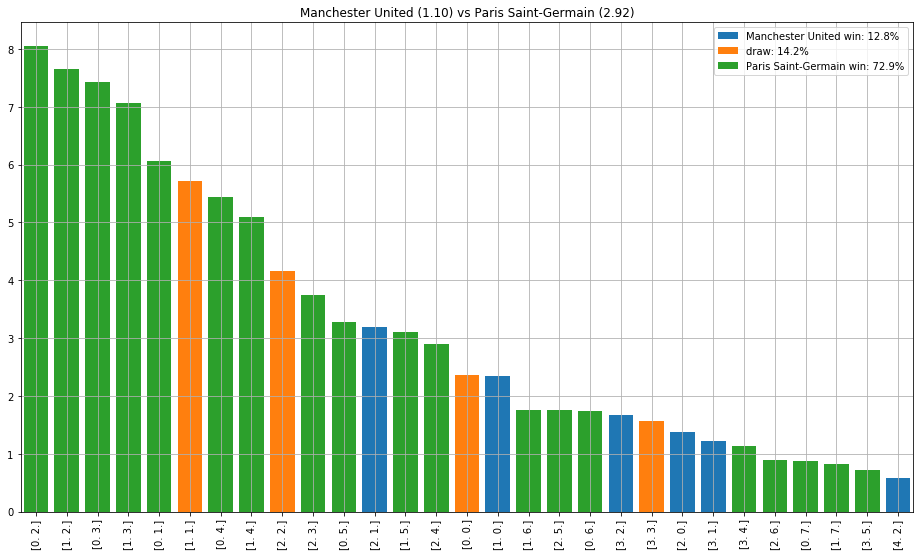

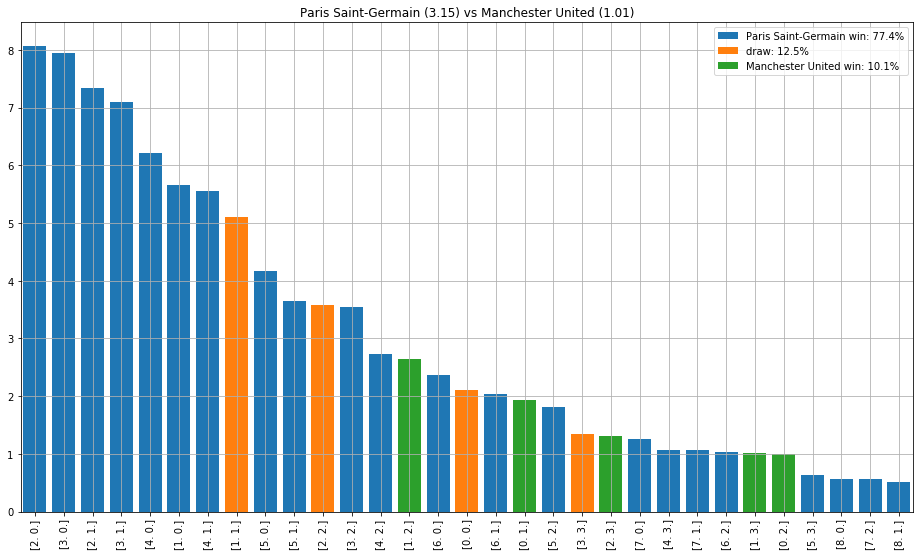

In [8]:
team1=teams['Manchester United']
team2=teams['Paris Saint-Germain']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

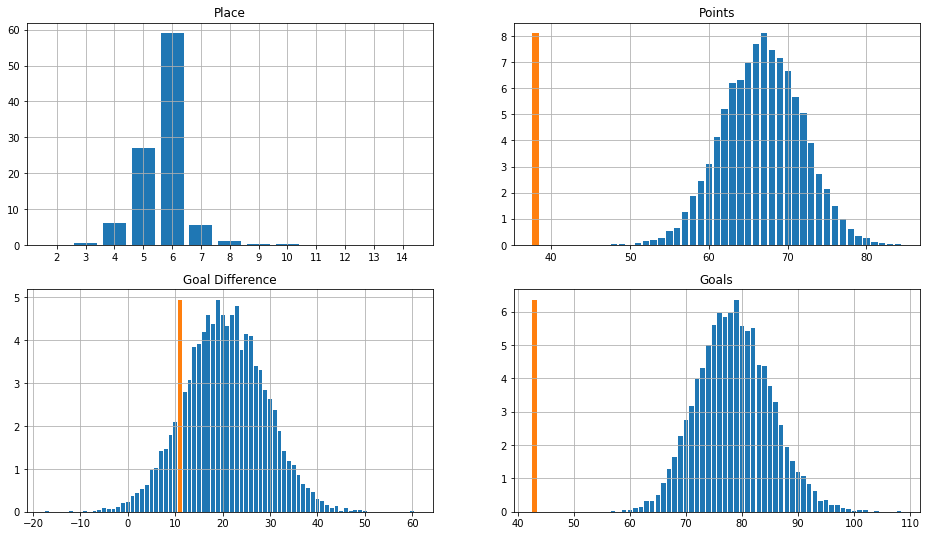

In [9]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

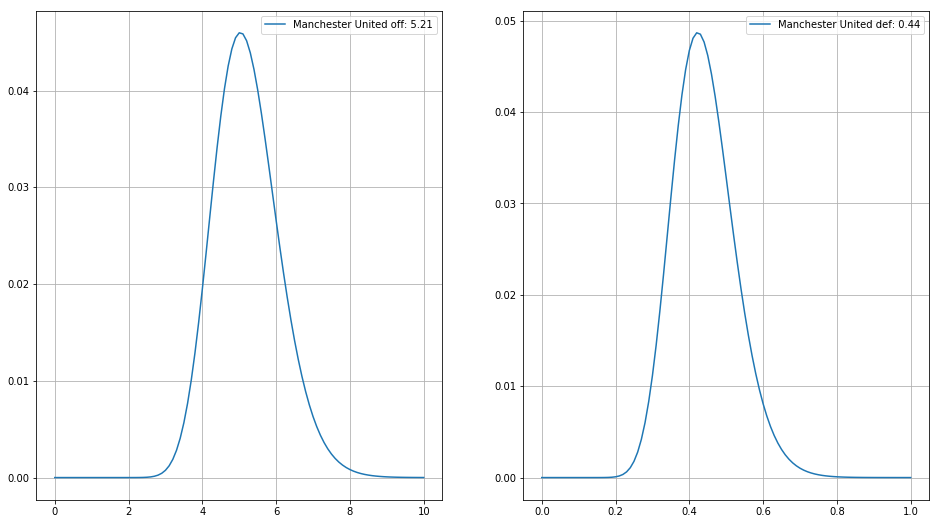

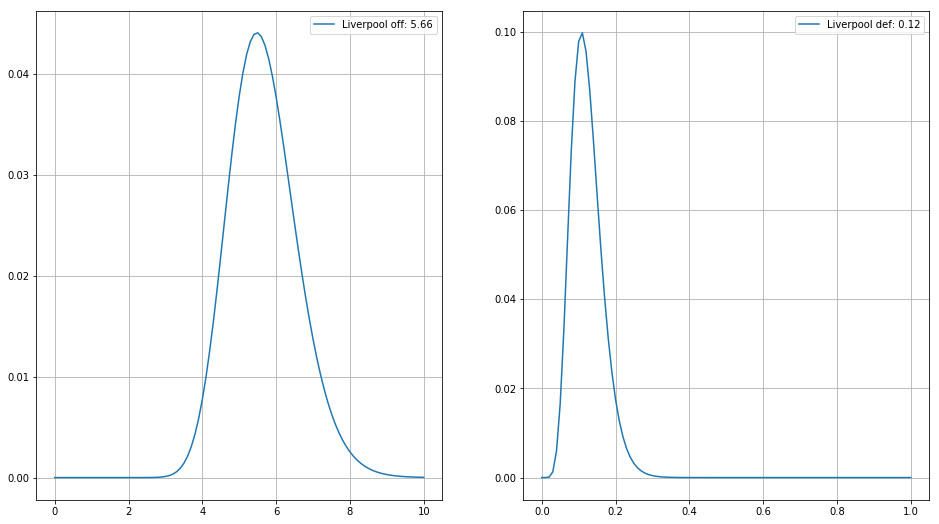

In [10]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

array([6.89      , 6.98989021, 6.49350649, 5.56414219])

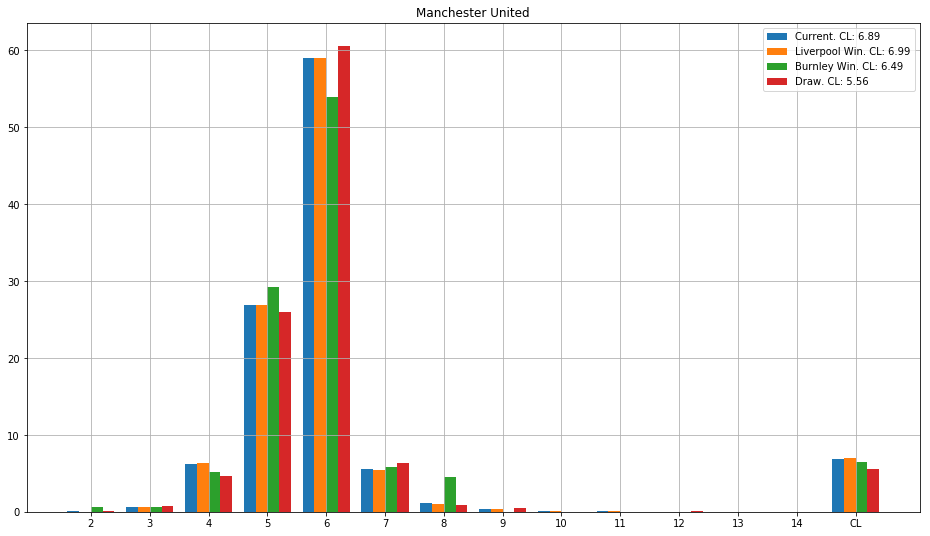

In [11]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=2,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([ 6.89      ,  5.11049724, 11.40275387,  6.7940552 ])

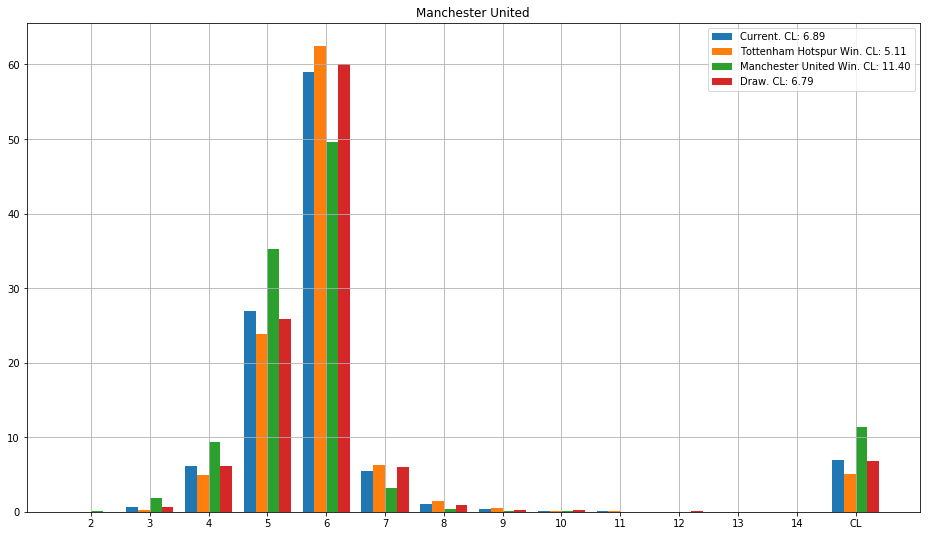

In [12]:
PremierLeague.what_if('Tottenham Hotspur v Manchester United',ref_team='Manchester United')

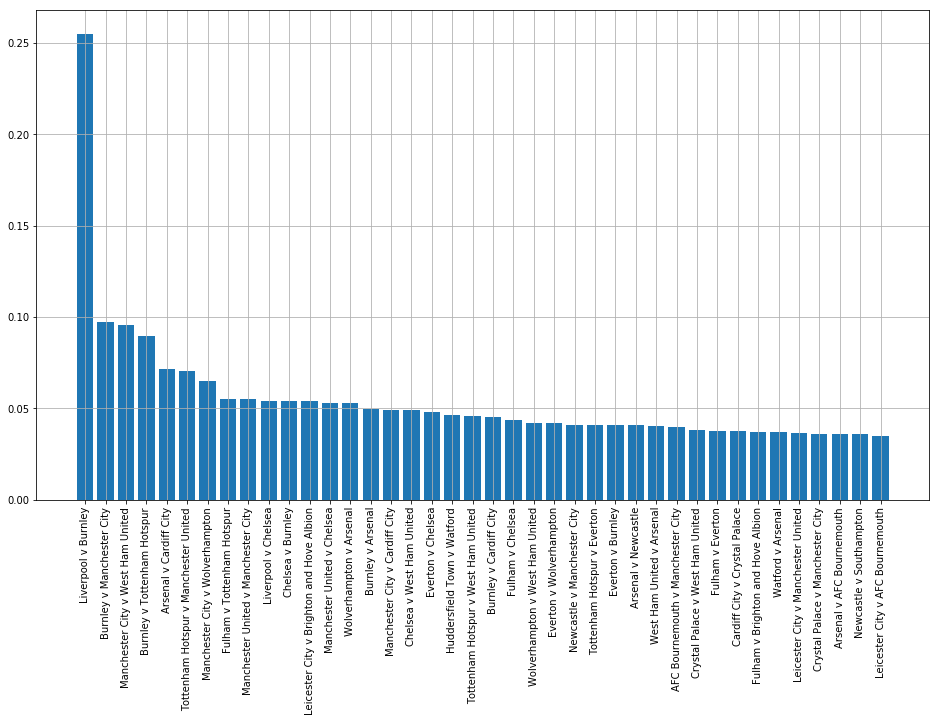

In [13]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

1.694194117647059

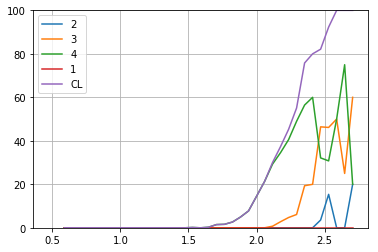

In [14]:
team_name='Manchester United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n